# Credit Risk Evaluator

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [54]:
# Import the data
import pandas as pd
file = Path('Resources/lending_data.csv')


In [55]:
df = pd.read_csv(file)
df.sample(10)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
37533,9200.0,7.030,46800,0.358974,3,0,16800,0
70950,10200.0,7.468,50900,0.410609,4,1,20900,0
51693,8200.0,6.590,42600,0.295775,2,0,12600,0
54950,10600.0,7.615,52300,0.426386,5,1,22300,0
11091,9300.0,7.090,47300,0.365751,3,0,17300,0
62910,11000.0,7.787,53900,0.443414,5,1,23900,0
75270,19000.0,11.207,86100,0.651568,12,2,56100,1
65768,8800.0,6.851,45100,0.334812,3,0,15100,0
7062,9900.0,7.315,49400,0.392713,4,0,19400,0
28564,9800.0,7.276,49100,0.389002,4,0,19100,0


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [56]:
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

In [57]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
71605,7700.0,6.409,40900,0.266504,2,0,10900
19074,9000.0,6.951,46000,0.347826,3,0,16000
29266,10900.0,7.758,53600,0.440299,5,1,23600
46568,11000.0,7.811,54100,0.445471,5,1,24100
64729,10600.0,7.634,52400,0.427481,5,1,22400


In [58]:
# print(f"Labels: {y[:10]}")
# print(f"Data: {X[:10]}")

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [59]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9918489475856377

In [60]:
from sklearn.metrics import balanced_accuracy_score

y_pred = clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9548310683587886

In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[18664,   106],
       [   52,   562]])

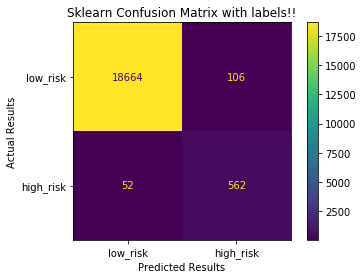

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['low_risk', 'high_risk'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Results', 
                ylabel='Actual Results')
plt.show()

In [62]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.9914362360709864

In [63]:
from sklearn.metrics import balanced_accuracy_score

y_pred1 = clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9548310683587886

In [64]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred1)

array([[18669,   101],
       [   65,   549]])

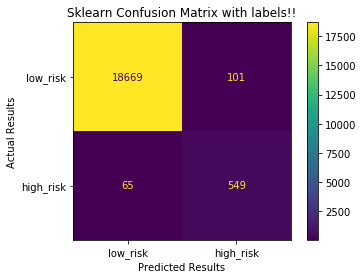

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1)
cmd_obj = ConfusionMatrixDisplay(cm1, display_labels=['low_risk', 'high_risk'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Results', 
                ylabel='Actual Results')
plt.show()

*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*

### My prediction as to Which model i think performed better 
#  Looking at the dataset, I believe that the logistic regression model will perform better for this dataset. With a lot of variables to consider, the Logistic model will win out over the Random Forest model.


### How does that compare to my prediction? 
#   Based on my research, Random Forest is recommended for simple classification problems.


### Results and thoughts in the designated markdown cell.
#   Logistic Regression model score = 0.9914878250103177
#   balanced_accuracy_score = 0.9823995861872097

### Random Forest Classifier model score
#   RandomForestClassifier = 0.991642591828312
#   balanced_accuracy_score = 0.9515284156142365

### Conclusion
#  I was suprised that Random Forest stayed more consistant and appears by my understand to be the better choice for this dataset in this supervised learning challenge